In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Parte 1

In [28]:
def create_gauss_filter(h, w, k_size, sigma):
    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernelGauss = nucleo_g * nucleo_g.T
    nx = (w-k_size)//2
    ny = (h-k_size)//2
    for i in range(0,nx):
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(k_size), axis =1)
        kernelGauss =  np.insert(kernelGauss, kernelGauss.shape[1], np.zeros(k_size), axis =1)
    if (w-k_size)%2==1:
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(k_size), axis =1)
    for i in range(0,ny):
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(kernelGauss.shape[1]), axis = 0)
        kernelGauss =  np.insert(kernelGauss, kernelGauss.shape[0], np.zeros(kernelGauss.shape[1]), axis =0)
    if (h-k_size)%2==1:
        kernelGauss =  np.insert(kernelGauss, 0, np.zeros(kernelGauss.shape[1]), axis = 0)
    gauss_filter_fourier = np.fft.fft2(kernelGauss)
    gauss_filter_fourier = np.fft.fftshift(gauss_filter_fourier)
    gauss_filter_fourier = 20*np.log(np.abs(gauss_filter_fourier))
    return kernelGauss, gauss_filter_fourier

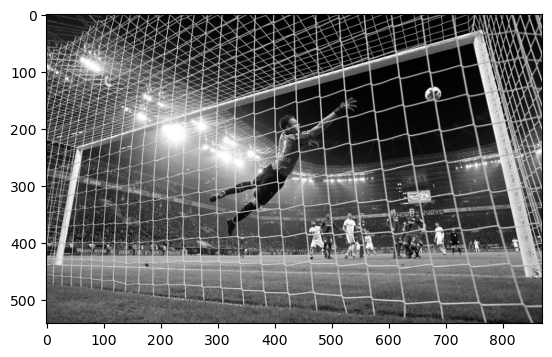

In [29]:
img = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP2/golazo.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

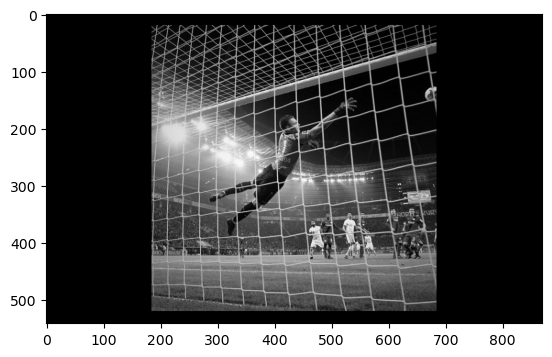

In [30]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],500,400)[0]
plt.imshow(out, cmap='gray')
plt.show()

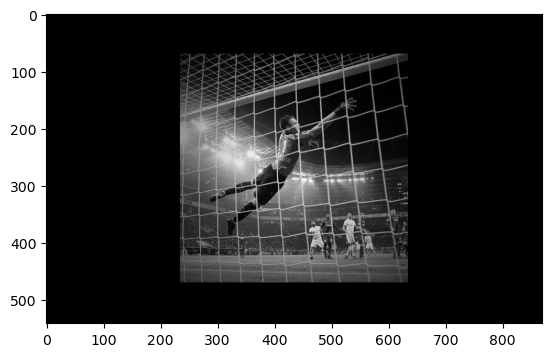

In [31]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],400,200)[0]
plt.imshow(out, cmap='gray')
plt.show()

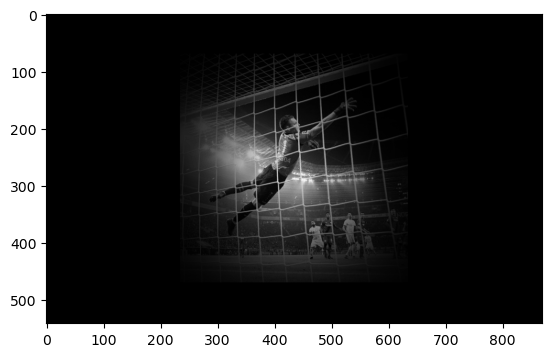

In [32]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],400,100)[0]
plt.imshow(out, cmap='gray')
plt.show()

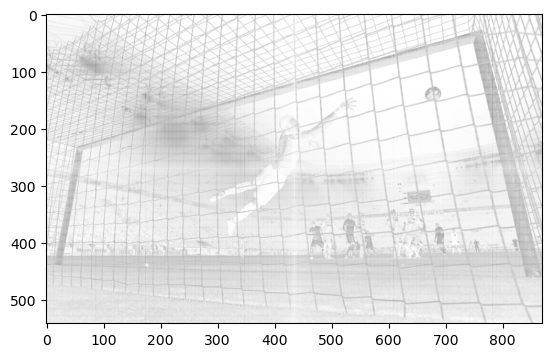

In [33]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],500,400)[1]
plt.imshow(out, cmap='gray')
plt.show()

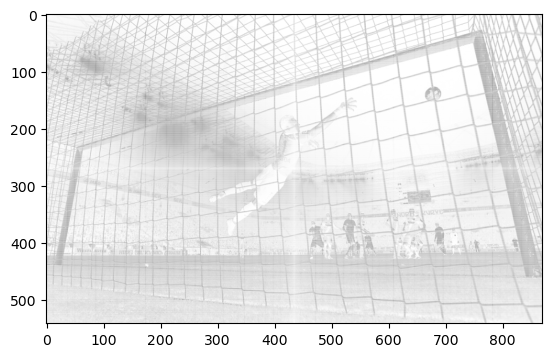

In [34]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],400,200)[1]
plt.imshow(out, cmap='gray')
plt.show()

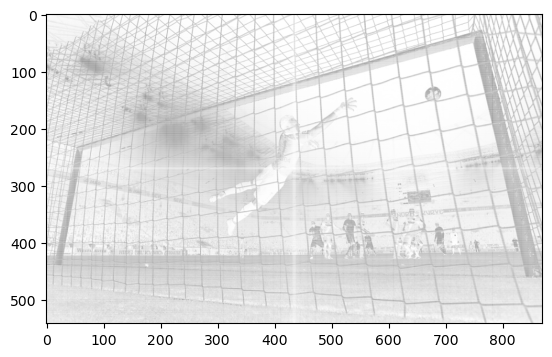

In [35]:
out = img * create_gauss_filter(img.shape[0],img.shape[1],400,100)[1]
plt.imshow(out, cmap='gray')
plt.show()

Ejercicio 2

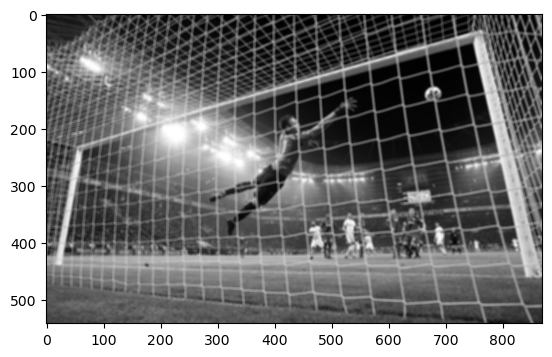

In [36]:
result = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=100)
plt.imshow(result, cmap='gray')
plt.show()

In [43]:
def quality(image):
    m, n = image.shape[0], image.shape[1]
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    thres = M/1000
    th = sum(1 for fila in F for elemento in fila if elemento > thres)
    return th/(m*n)

In [44]:
print(f'Calidad del filtro espectral: {quality(out)}\nCalidad filtro convolucional {quality(result)}')

Calidad del filtro espectral: 0.02216142851083683
Calidad filtro convolucional 0.007284641811935361


Ejercicio 3

Image contrast (MIS3)

In [76]:
def mis3(image):
    m, n = image.shape[0], image.shape[1]
    c= np.zeros(image.shape)
    for i in range(1, m-1):
        c[i,0] = np.abs(image[i,0]-image[i-1,0])+np.abs(image[i,0]-image[i-1,1])+\
                +np.abs(image[i,0]-image[i,1])+\
                +np.abs(image[i,0]-image[i+1,0])+np.abs(image[i,0]-image[i+1,1])
        c[i,n-1] = np.abs(image[i,n-1]-image[i-1,n-2])+np.abs(image[i,n-1]-image[i-1,n-1])+\
                np.abs(image[i,n-1]-image[i,n-2])+\
                np.abs(image[i,n-1]-image[i+1,n-2])+np.abs(image[i,n-1]-image[i+1,n-1])
        for j in range(1, n-1):
            c[i,j] = np.abs(image[i,j]-image[i-1,j-1])+np.abs(image[i,j]-image[i-1,j])+np.abs(image[i,j]-image[i-1,j+1])+\
                np.abs(image[i,j]-image[i,j-1])+np.abs(image[i,j]-image[i,j+1])+\
                np.abs(image[i,j]-image[i+1,j-1])+np.abs(image[i,j]-image[i+1,j])+np.abs(image[i,j]-image[i+1,j+1])        
    for j in range(0, n):
        c[0,j] =np.abs(image[0,j]-image[0,j-1])+\
                np.abs(image[0,j]-image[1,j-1])+np.abs(image[0,j]-image[1,j])
        c[m-1,j] = np.abs(image[m-1,j]-image[m-2,j-1])+np.abs(image[m-1,j]-image[m-2,j])+\
                np.abs(image[m-1,j]-image[m-1,j-1])
    return sum(sum(fila) for fila in c)
    

In [77]:
print(f'Image contrast del filtro espectral: {mis3(out)}\nImage contrast filtro convolucional {mis3(result)}')

/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  c[i,0] = np.abs(image[i,0]-image[i-1,0])+np.abs(image[i,0]-image[i-1,1])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  +np.abs(image[i,0]-image[i,1])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  c[i,n-1] = np.abs(image[i,n-1]-image[i-1,n-2])+np.abs(image[i,n-1]-image[i-1,n-1])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  np.abs(image[i,n-1]-image[i,n-2])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  np.abs(image[i,n-1]-image[i+1,n-2])+np.abs(image[i,n-1]-image[i+1,n-1])
/var/folders/02/44

Image contrast del filtro espectral: 28147990266.952923
Image contrast filtro convolucional 57404357.0


/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  c[0,j] =np.abs(image[0,j]-image[0,j-1])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  np.abs(image[0,j]-image[1,j-1])+np.abs(image[0,j]-image[1,j])
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  c[m-1,j] = np.abs(image[m-1,j]-image[m-2,j-1])+np.abs(image[m-1,j]-image[m-2,j])+\
/var/folders/02/4444mn1j271dctx2095zm4_m0000gn/T/ipykernel_9561/337591405.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  np.abs(image[m-1,j]-image[m-1,j-1])


Image contrast del filtro espectral: 28147990266.952923

Image contrast filtro convolucional 57404357.0